# Intro 

# Import Libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import ml_util as util

import datetime

date = datetime.date.today()
year = date.strftime("%Y")


pd.set_option('max_columns', None)

# Create DataFrames

In [2]:
test = pd.read_csv('test.csv', index_col=0)
training = pd.read_csv('train.csv', index_col=0)

training['train_test'] = 1
test['train_test'] = 0
test['SalePrice'] = np.NaN
all_data = pd.concat([training,test])

# EDA

In [3]:
training.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,train_test
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,1
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,1
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,1
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,1
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,1


In [4]:
print(training.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
#util.understanding(training)

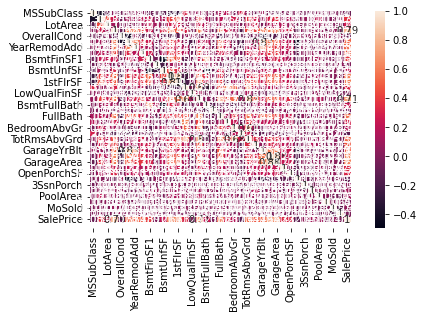

In [7]:
util.heat(training)


In [8]:
corr = util.correlation(training, .8)
corr_array = []
for col in corr:
    corr_array.append(col)
corr_array

['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageArea']

# Feature Engineering

In [9]:
print(training.MSSubClass.value_counts())

mssub_others = [190, 85, 75, 45, 180, 40]

training.MSSubClass = training.MSSubClass.apply(lambda x: str('other') if x in mssub_others else str(x))

print(training.MSSubClass.value_counts())

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
20       536
60       299
50       144
other     92
120       87
30        69
160       63
70        60
80        58
90        52
Name: MSSubClass, dtype: int64


In [10]:

print(training.MSZoning.value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64


In [11]:
mszoning_others = ['FV', 'RH', 'C (all)']
training.MSZoning = training.MSZoning.apply(lambda x: str('Other') if x in mszoning_others else str(x))
print(training.MSZoning.value_counts())

RL       1151
RM        218
Other      91
Name: MSZoning, dtype: int64


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


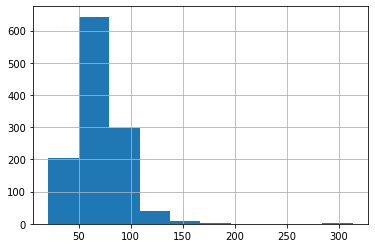

In [12]:
print(training.LotFrontage.value_counts())
print(training.LotFrontage.hist())

<AxesSubplot:>

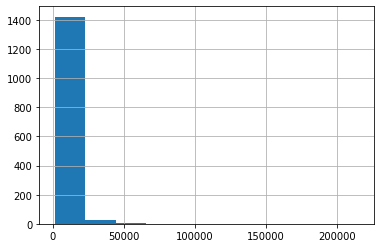

In [13]:
training.LotArea.hist()

In [14]:
print(training.Street.value_counts())
training['Street_Pave'] = training.Street.apply(lambda x: 1 if x == 'Pave' else 0)
training.Street_Pave.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64


1    1454
0       6
Name: Street_Pave, dtype: int64

In [15]:
print(training.Alley.value_counts())
training.Alley = training.Alley.apply(lambda x: 1 if type(x) == str else 0)
training.Alley.value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64


0    1369
1      91
Name: Alley, dtype: int64

In [16]:
training.LotShape.value_counts()
lotshape_others = ['IR2', 'IR3']
training.LotShape = training.LotShape.apply(lambda x: 'Other' if x in lotshape_others else x)
training.LotShape.value_counts()

Reg      925
IR1      484
Other     51
Name: LotShape, dtype: int64

In [17]:
training.LandContour.value_counts()
training['LandContour_Flat'] = training.LandContour.apply(lambda x: 1 if x == 'Lvl' else 0)
training.LandContour_Flat.value_counts()

1    1311
0     149
Name: LandContour_Flat, dtype: int64

In [18]:
training.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [19]:
training.LotConfig.value_counts()
training.LotConfig = training.LotConfig.apply(lambda x: 'Other' if x == 'FR2' or x == 'FR3' else x)
training.LotConfig.value_counts()

Inside     1052
Corner      263
CulDSac      94
Other        51
Name: LotConfig, dtype: int64

In [20]:
training.LandSlope.value_counts()
training['LandSlope_Gentle'] = training.LandSlope.apply(lambda x: 1 if x == 'Gtl' else 0)
training.LandSlope_Gentle.value_counts()

1    1382
0      78
Name: LandSlope_Gentle, dtype: int64

In [21]:
training.Neighborhood.value_counts()

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

In [22]:
training.Condition1.value_counts()
pos_condition = ['Feedr', 'Artery', 'PosN', 'PosA']
rr_condition = ['RRAe', 'RRAn', 'RRNn', 'RRNe']
training.Condition1 = training.Condition1.apply(lambda x: 'Pos' if x in pos_condition else x)
training.Condition1 = training.Condition1.apply(lambda x: 'RR' if x in rr_condition else x)
training.Condition1.value_counts()

Norm    1260
Pos      156
RR        44
Name: Condition1, dtype: int64

In [23]:
training.Condition2.value_counts()
pos_condition = ['Feedr', 'Artery', 'PosN', 'PosA']
rr_condition = ['RRAe', 'RRAn', 'RRNn', 'RRNe']
training.Condition2 = training.Condition2.apply(lambda x: 'Pos' if x in pos_condition else x)
training.Condition2 = training.Condition2.apply(lambda x: 'RR' if x in rr_condition else x)
training.Condition2.value_counts()

Norm    1445
Pos       11
RR         4
Name: Condition2, dtype: int64

In [24]:
training.BldgType.value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [25]:
training.HouseStyle.value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

In [26]:
training.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [27]:
training.OverallCond.value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64


<AxesSubplot:>

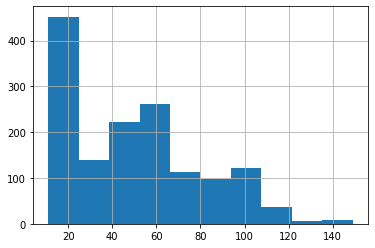

In [28]:
print(training.YearBuilt.value_counts())

date = datetime.date.today()
year = int(date.strftime("%Y"))

training['Year_Old'] = training.YearBuilt.apply(lambda x: year - x)
training.Year_Old.value_counts()
training.Year_Old.hist()

1950    178
2006     97
2007     76
2005     73
2004     62
       ... 
2010      6
1986      5
1952      5
1983      5
1951      4
Name: YearRemodAdd, Length: 61, dtype: int64
71    178
15     97
14     76
16     73
17     62
     ... 
11      6
35      5
69      5
38      5
70      4
Name: Remod_Age, Length: 61, dtype: int64


<AxesSubplot:>

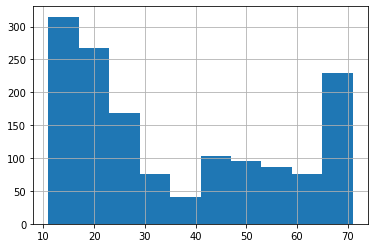

In [29]:
print(training.YearRemodAdd.value_counts())
training['Remod_Age'] = training.YearRemodAdd.apply(lambda x: year - x)
print(training.Remod_Age.value_counts())
training.Remod_Age.hist()

In [30]:
training.RoofStyle.value_counts()
training['Gable_Roof'] = training.RoofStyle.apply(lambda x: 1 if x == 'Gable' else 0)
training.Gable_Roof.value_counts()

1    1141
0     319
Name: Gable_Roof, dtype: int64

In [31]:
training.RoofMatl.value_counts()
training['Comp_Roof'] = training.RoofMatl.apply(lambda x: 1 if x == 'CompShg' else 0)
training.Comp_Roof.value_counts()

1    1434
0      26
Name: Comp_Roof, dtype: int64

In [32]:
training.Exterior1st.value_counts()
ext1_others = ['WdShing','Stucco', 'AsbShng', 'BrkComm', 'Stone', 'AsphShn', 'ImStucc', 'CBlock']
training.Exterior1st = training.Exterior1st.apply(lambda x: 'Other' if x in ext1_others else x)
training.Exterior1st.value_counts()

VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
Other       78
CemntBd     61
BrkFace     50
Name: Exterior1st, dtype: int64

In [33]:
training.Exterior2nd.value_counts()
ext2 = ['BrkFace', 'Other', 'Brk Cmn']
ext2_others = ext1_others + ext2
training.Exterior2nd = training.Exterior2nd.apply(lambda x: 'Other' if x in ext2_others else x)
training.Exterior2nd.value_counts()


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
Other       98
CmentBd     60
Wd Shng     38
Name: Exterior2nd, dtype: int64

In [34]:
print(training.MasVnrType.value_counts())
print(training.MasVnrType.isnull().sum().sum())
training.MasVnrType.fillna('None', inplace=True)
print(training.MasVnrType.value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
8
None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [35]:
training.MasVnrArea.value_counts()
print(training.MasVnrArea.isnull().sum().sum())
training.MasVnrArea.fillna(0, inplace=True)
print(training.MasVnrArea.isnull().sum().sum())

8
0


In [36]:
#Ex	Excellent (100+ inches)	
#Gd	Good (90-99 inches)
#TA	Typical (80-89 inches)
#Fa	Fair (70-79 inches)
#Po	Poor (<70 inches
#NA	No Basement

training.ExterQual.value_counts()
ex_po = ['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
ex_po_ord = OrdinalEncoder(categories=[ex_po])
training.ExterQual = ex_po_ord.fit_transform(training[['ExterQual']])


training.ExterQual.value_counts()


3.0    906
4.0    488
5.0     52
2.0     14
Name: ExterQual, dtype: int64

In [37]:
training.ExterCond.value_counts()
training.ExterCond = ex_po_ord.fit_transform(training[['ExterCond']])
training.ExterCond.value_counts()

3.0    1282
4.0     146
2.0      28
5.0       3
1.0       1
Name: ExterCond, dtype: int64

In [38]:
training.Foundation.value_counts()
found_others = ['Slab', 'Stone', 'Wood']

training.Foundation = training.Foundation.apply(lambda x: 'Other' if x in found_others else x)
training.Foundation.value_counts()

PConc     647
CBlock    634
BrkTil    146
Other      33
Name: Foundation, dtype: int64

In [39]:
training.BsmtQual.value_counts()
training.BsmtQual.fillna('NA', inplace=True)
training.BsmtQual.value_counts()

training.BsmtQual = ex_po_ord.fit_transform(training[['BsmtQual']])
training.BsmtQual.value_counts()


3.0    649
4.0    618
5.0    121
0.0     37
2.0     35
Name: BsmtQual, dtype: int64

In [44]:
print(training.BsmtCond.value_counts())
training.BsmtCond.fillna('NA', inplace=True)
print(training.BsmtCond.value_counts())

training.BsmtCond = ex_po_ord.fit_transform(training[['BsmtCond']])
training.BsmtCond.value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
TA    1311
Gd      65
Fa      45
NA      37
Po       2
Name: BsmtCond, dtype: int64


3.0    1311
4.0      65
2.0      45
0.0      37
1.0       2
Name: BsmtCond, dtype: int64

In [48]:
print(training.BsmtExposure.value_counts())
training.BsmtExposure.fillna('NA', inplace=True)
print(training.BsmtExposure.value_counts())

bs_ex = ['NA', 'No', 'Mn', 'Av', 'Gd']
bs_ex_ord = OrdinalEncoder(categories=[bs_ex])
training.BsmtExposure = bs_ex_ord.fit_transform(training[['BsmtExposure']])
training.BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64
No    953
Av    221
Gd    134
Mn    114
NA     38
Name: BsmtExposure, dtype: int64


1.0    953
3.0    221
4.0    134
2.0    114
0.0     38
Name: BsmtExposure, dtype: int64

In [52]:
print(training.BsmtFinType1.value_counts())
training.BsmtFinType1.fillna('NA', inplace=True)
print(training.BsmtFinType1.value_counts())

fin_type = ['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ']
fin_type_enc = OrdinalEncoder(categories=[fin_type])
training.BsmtFinType1 = fin_type_enc.fit_transform(training[['BsmtFinType1']])
training.BsmtFinType1.value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NA      37
Name: BsmtFinType1, dtype: int64


1.0    430
6.0    418
5.0    220
4.0    148
3.0    133
2.0     74
0.0     37
Name: BsmtFinType1, dtype: int64

<AxesSubplot:ylabel='BsmtFinSF1'>

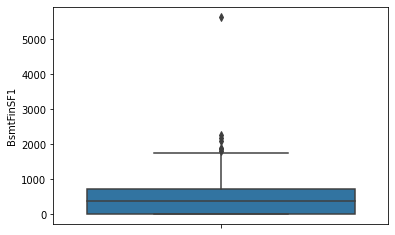

In [57]:
sns.boxplot(data=training, y='BsmtFinSF1')

In [60]:
print(training.BsmtFinType2.value_counts())
training.BsmtFinType2.fillna('NA', inplace=True)
print(training.BsmtFinType2.value_counts())

training.BsmtFinType2 = fin_type_enc.fit_transform(training[['BsmtFinType2']])
training.BsmtFinType2.value_counts()

Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
Unf    1256
Rec      54
LwQ      46
NA       38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


1.0    1256
3.0      54
2.0      46
0.0      38
4.0      33
5.0      19
6.0      14
Name: BsmtFinType2, dtype: int64

<AxesSubplot:ylabel='BsmtFinSF2'>

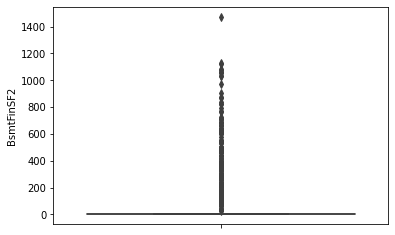

In [61]:
sns.boxplot(y = training.BsmtFinSF2)

# Train Test Split

In [40]:

all_data.fillna(value={'BsmtQual': 'None', 'BsmtCond': 'None', 'BsmtFinType1': 'None', 'BsmtFinType2': 'None', 'FireplaceQu': 'None', 
         'GarageType': 'None', 'GarageCond': 'None', 'GarageFinish': 'None', 
                'GarageQual': 'None', 'MasVnrType': 'None', 'MasVnrArea': 0, 'BsmtExposure': 'None', 
                'BsmtFinSF1': 0, 'BsmtFinSF2': 0, 'BsmtUnfSF': 0, 'TotalBsmtSF': 0, 'SaleType': 'Oth', 
                'BsmtFullBath': 0, 'BsmtHalfBath': 0}, inplace=True)

all_data.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley'], axis=1, inplace=True)

all_data.drop(all_data[all_data.Exterior1st.isnull()].index, inplace=True)

all_data.drop(columns=corr_array, inplace=True)

uniques = ['RH', 'RL', 'RM', 'FV', 'C (all)']
all_data.drop(all_data[all_data.MSZoning.isin(uniques) == False].index, inplace=True)

all_data.LotFrontage.fillna(all_data.LotFrontage.median(), inplace=True)

all_data.Utilities.fillna('AllPub', inplace=True)



In [41]:

features_to_scale =['LotFrontage', 'LotArea', 'Year_Old', 'Remod_Age', 'MasVnrArea', 'BsmtFinSF1']


# Modeling

In [42]:
model = LinearRegression()